## Import Libraries

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import pandas as pd
import os
import cv2
import IPython.display
from IPython.display import display



In [58]:
file_path = r"C:\Users\Aniket\Desktop\ML Project\Project\Dataset"
classes = ['biodegradable','glass','metal','paper','plastic']
IMG_SIZE=60

## Testing for Image Read

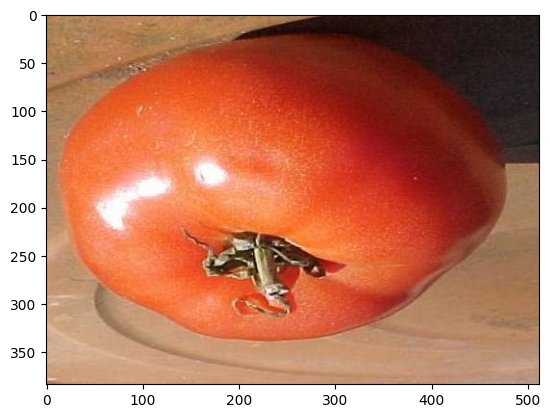

In [59]:
for waste_class in classes:
    path=os.path.join(file_path, waste_class)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        new_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(new_array)
        plt.show()
        break
    break

In [60]:
training_data=[]
data_count = []
def create_training_data():
    for waste_class in classes:
        path=os.path.join(file_path, waste_class)
        class_num=classes.index(waste_class)
        count = 0
        for img in os.listdir(path):
            count = count + 1;
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array=cv2.resize(new_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
        data_count.append(count)
create_training_data()  

In [61]:
print(data_count)
total_data = len(training_data)
print(total_data)

# Percentage of data for each class
per_data = []
for i in range(5):
    count = data_count[i]/float(total_data)
    count = round(count,2)
    per_data.append(count*100)
print(per_data)

[798, 759, 773, 743, 725]
3796
[21.0, 20.0, 20.0, 20.0, 19.0]


## plot dataset on pie chart

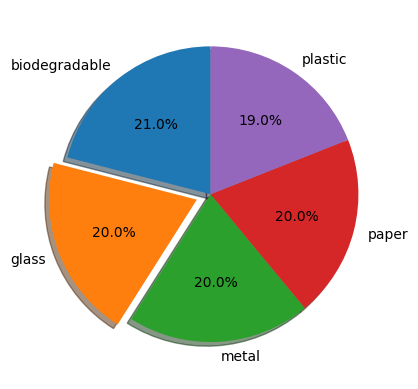

In [62]:
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0, 0) 
ax1.pie(per_data, explode=explode, labels=classes,autopct='%1.1f%%',
        shadow=True, startangle=90)
 
plt.show()

In [63]:
lenofimage = len(training_data)
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

## Data Scaling 

In [64]:
X = X/255.0

In [65]:
y=np.array(y)

## Data Split into Training and Testing

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier(n_estimators=50, random_state=0)
pred = rnd_forest.fit(X_train, y_train)
pred_test = pred.predict(X_test)
print("Accuracy with Random Forest : {}".format(accuracy_score(y_test, pred_test)))

Accuracy with Random Forest : 0.7565858798735511


## Model Prediction Using Random Forest

In [68]:
def model_rnd_pred(img):
    pred_test = pred.predict(img)
    
    if(pred_test[0] == 0):
        print("Image belong to Biodegradable")
        
    elif(pred_test[0] == 1):
        print("Image belong to glass")
        
    elif(pred_test[0] == 2):
        print("Image belong to metal")
        
    elif(pred_test[0] == 3):
        print("Image belong to paper")
        
    elif(pred_test[0] == 4):
        print("Image belong to plastic")

In [69]:
img = r"C:\Users\Aniket\Desktop\ML Project\Project\Dataset\glass\bio_1.jpg"
img_array=cv2.imread(img)
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
# new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
# new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
# new_array = X_test[3]
# new_array = cv2.resize(new_array,(60,60))
new_array= np.array(new_array).reshape(1,-1)
print(new_array.shape)

model_rnd_pred(new_array)

(1, 10800)
Image belong to glass


In [70]:
print("Predication : ",pred_test)
print("Original : ",y_test)

Predication :  [3 1 4 3 4 1 3 4 0 0 1 0 4 1 0 1 0 1 0 0 3 1 0 1 0 1 0 3 2 0 4 2 3 3 4 3 3
 1 2 3 4 3 3 4 0 0 1 3 2 3 0 2 4 3 0 2 2 2 0 0 1 3 3 2 1 4 1 1 2 4 0 2 3 3
 2 1 1 1 0 2 0 4 1 4 1 4 1 2 4 3 2 4 4 4 2 2 3 3 4 0 4 3 2 3 1 3 3 2 0 0 4
 3 0 0 4 4 3 3 0 2 0 2 1 1 4 3 3 3 2 4 2 1 4 0 0 0 1 0 1 1 0 4 4 0 3 4 0 4
 4 2 2 0 0 2 4 2 3 2 1 0 3 3 3 4 1 1 0 2 2 2 0 1 3 3 2 4 0 4 0 0 1 1 3 2 2
 0 1 2 0 0 4 1 2 2 2 1 2 0 1 2 1 1 0 4 2 4 4 2 4 4 1 4 2 4 0 3 1 4 0 1 2 2
 0 4 3 2 2 0 1 1 1 2 0 1 4 0 2 2 2 2 2 0 1 2 4 2 1 2 0 3 0 1 1 2 1 4 1 3 0
 3 2 2 1 0 3 2 1 1 4 1 3 0 3 3 0 3 2 3 4 3 4 4 0 2 1 4 4 0 0 0 4 2 2 2 2 3
 4 3 2 0 4 4 3 4 2 3 3 1 3 3 3 0 3 2 4 4 4 2 3 0 0 0 1 1 0 1 2 0 4 0 3 0 1
 0 4 2 0 3 1 0 0 2 3 2 2 0 0 0 0 1 4 0 1 0 1 0 4 2 4 1 0 4 1 0 0 1 4 1 0 0
 2 0 0 1 4 3 0 0 2 3 4 0 2 0 0 3 1 2 3 2 0 0 4 2 2 4 4 1 1 3 1 3 4 0 2 4 2
 3 2 4 2 4 0 3 3 2 1 3 0 0 3 0 4 3 0 4 0 4 0 2 0 3 2 3 2 2 1 2 2 2 2 2 0 3
 2 1 0 3 1 4 3 3 0 0 3 2 3 3 3 0 1 3 0 0 2 0 4 2 3 0 0 1 2 1 1 0 4 3 4 1 0
 4 0 1 3 3

### Random Forest Classification report

In [71]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       206
           1       0.71      0.71      0.71       180
           2       0.68      0.77      0.72       180
           3       0.85      0.75      0.80       208
           4       0.71      0.64      0.67       175

    accuracy                           0.76       949
   macro avg       0.75      0.75      0.75       949
weighted avg       0.76      0.76      0.76       949



### Random Forest Accuracy Score :

In [72]:
acc_random_forest = round(rnd_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

75.66

In [97]:

import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set the file path for the image you want to classify

image_file_path = r"C:\Users\Aniket\Desktop\WhatsApp Image 2024-04-27 at 17.08.25_2b0c4130.jpg"

IMG_SIZE = 60

# Load the image
img = cv2.imread(image_file_path)
cv2.imshow("test",img)
cv2.waitKey(4000)


resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))


resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)


flattened_img = resized_img.reshape(1, -1) / 255.0  


# Predict using your model
predicted_class_index = rnd_forest.predict(flattened_img)[0]

# Mapping of class index to class name
classes = ['biodegradable', 'glass', 'metal', 'paper', 'plastic']
predicted_class_name = classes[predicted_class_index]


print(f"The image is classified as: {predicted_class_name}")


The image is classified as: biodegradable
